# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/src/data/rez_sample_04ALL/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Unnamed: 0,Branch,Option,Build Time,Binary Size
0,0,isqlite-00001-00002,"['--disable-option-checking', '--disable-libto...",55.4875,10169536
1,1,isqlite-00001-00003,"['--disable-threadsafe', '--disable-load-exten...",0.0100,10169536
2,2,isqlite-00001-00004,"['--disable-option-checking', '--disable-libto...",0.0090,10169536
3,3,isqlite-00001-00005,"['--disable-libtool-lock', '--disable-threadsa...",47.0405,10169536
4,4,isqlite-00001-00006,"['--disable-option-checking', '--disable-libto...",56.5520,10169536
...,...,...,...,...,...
375,375,isqlite-00020-00015,"['--disable-option-checking', '--disable-libto...",0.0110,10169536
376,376,isqlite-00020-00016,"['--disable-option-checking', '--disable-tcl',...",0.0100,10169536
377,377,isqlite-00020-00017,"['--disable-libtool-lock', '--disable-tcl', '-...",0.0100,10169536
378,378,isqlite-00020-00018,"['--disable-option-checking', '--disable-libto...",63.4310,10169536


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")

df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Unnamed: 0,Branch,Option,Build Time,Binary Size,Br0,Br1,Br2
0,0,isqlite-00001-00002,"['--disable-option-checking', '--disable-libto...",55.4875,10169536,isqlite,00001,00002
1,1,isqlite-00001-00003,"['--disable-threadsafe', '--disable-load-exten...",0.0100,10169536,isqlite,00001,00003
2,2,isqlite-00001-00004,"['--disable-option-checking', '--disable-libto...",0.0090,10169536,isqlite,00001,00004
3,3,isqlite-00001-00005,"['--disable-libtool-lock', '--disable-threadsa...",47.0405,10169536,isqlite,00001,00005
4,4,isqlite-00001-00006,"['--disable-option-checking', '--disable-libto...",56.5520,10169536,isqlite,00001,00006
...,...,...,...,...,...,...,...,...
375,375,isqlite-00020-00015,"['--disable-option-checking', '--disable-libto...",0.0110,10169536,isqlite,00020,00015
376,376,isqlite-00020-00016,"['--disable-option-checking', '--disable-tcl',...",0.0100,10169536,isqlite,00020,00016
377,377,isqlite-00020-00017,"['--disable-libtool-lock', '--disable-tcl', '-...",0.0100,10169536,isqlite,00020,00017
378,378,isqlite-00020-00018,"['--disable-option-checking', '--disable-libto...",63.4310,10169536,isqlite,00020,00018


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt3 = opt2.unstack()
opt3

Build Time                                                        \
Br1        00001    00002    00003    00004    00005    00006    00007   
Br2                                                                      
00001        NaN  63.2785   0.0090   0.0100  63.3390  63.4545   0.0095   
00002    55.4875      NaN  55.4915  55.8920   0.0115   0.0110  55.7530   
00003     0.0100  62.3780      NaN   0.0095  62.4310  62.5815   0.0100   
00004     0.0090  63.3690   0.0100      NaN  63.6765  63.7160   0.0090   
00005    47.0405   0.0105  47.0760  47.3520      NaN   0.0110  47.2895   
00006    56.5520   0.0105  56.2800  94.2935  38.7750      NaN  94.4995   
00007     0.0095  51.8745   0.0100   0.0095  52.0505  52.0980      NaN   
00008     0.0100  62.2755   0.0090   0.0095  62.4310  62.5725   0.0090   
00009     0.0105  48.7050   0.0090   0.0095  48.8440  48.6490   0.0095   
00010     0.0095  55.6515   0.0100   0.0095  55.8485  55.8140   0.0100   
00011     0.0100  47.6680   0.0100   0.0090  47.8940  47.9765   0.0095   
00012     0.0100  50.7225   0.0095  50.8740  50.8560  50.8550  50.9525   
00013    50.0730   0.0105  49.9665  50.3570   0.0100   0.0105  50.3450   
00014     0.0095  63.4735   0.0095   0.0090  63.5140  63.5835   0.0090   
00015    49.5475   0.0115  49.5020  50.2690   0.0105  82.4585  49.8740   
00016    56.5175   0.0100  56.4560  56.9650   0.0100   0.0100  56.7550   
00017    48.6435   0.0105  48.6435  49.0155   0.0110   0.0100  48.8395   
00018     0.0100  63.2945   0.0100   0.0100  63.4885  63.3865   0.0100   
00019     0.0100  63.3845   0.0090   0.0100  63.9945  63.6625   0.0100   
00020    56.3170   0.0110  56.2740  56.8980   0.0110   0.0110  56.6365   

                                                                               \
Br1      00008    00009    00010    00011    00012    00013    00014    00015   
Br2                                                                             
00001   0.0095   0.0090   0.0095   0.0095   0.0095  64.1750   0.0105  64.1760   
00002  55.6830  56.4415  56.5050  56.4820  56.4405   0.0125  56.5890   0.0110   
00003   0.0100   0.0095   0.0095   0.0095   0.0095  63.4775   0.0105  63.4190   
00004   0.0090   0.0090   0.0100   0.0095   0.0095  64.4160   0.0100  64.4000   
00005  47.4050  48.3605  48.0505  47.8280  48.0855   0.0110  47.9260   0.0100   
00006  94.5710  56.8265  96.0475  57.3850  96.2060   0.0110  57.4260   0.0110   
00007   0.0090   0.0105   0.0100   0.0100   0.0100  52.6950   0.0100  52.8255   
00008      NaN   0.0095   0.0095   0.0090   0.0115  63.6525   0.0105  63.5175   
00009   0.0090      NaN   0.0090   0.0090   0.0090  49.3935   0.0105  49.5000   
00010   0.0095   0.0090      NaN   0.0090   0.0100  56.7925   0.0100  56.6315   
00011   0.0100   0.0100   0.0095      NaN   0.0095  48.4460   0.0090  48.5215   
00012  50.9855   0.0100  51.4515   0.0110      NaN  51.6065   0.0095  51.5975   
00013  50.1880  51.0505  51.0045  50.8455  50.8525      NaN  50.9990   0.0105   
00014   0.0105   0.0100   0.0095   0.0090  64.8610  64.8080      NaN  64.5725   
00015  49.8575  49.8240  50.6520  50.5515  50.7485   0.0140  50.4825      NaN   
00016  56.6420  57.5290  57.4955  57.4720  57.4935   0.0100  57.4480   0.0100   
00017  48.9270  49.5370  49.6445  49.4850  49.8985   0.0100  49.5495   0.0115   
00018   0.0100   0.0100   0.0100   0.0105   0.0090  64.3125   0.0105  64.3580   
00019   0.0100   0.0100   0.0105   0.0105   0.0100  64.4175   0.0090  64.4665   
00020  56.6555  58.3940  57.3550  57.3680  57.4375   0.0110  57.3845   0.0115   

                                                    
Br1      00016    00017    00018    00019    00020  
Br2                                                 
00001  64.5650  64.3330   0.0095   0.0105  63.4230  
00002   0.0100   0.0110  56.4125  56.5905   0.0110  
00003  63.4700  63.5685   0.0110   0.0110  62.5255  
00004  64.5060  64.5285   0.0100   0.0090  64.7745  
00005   0.0100   0.0110  47.8750  47.8690   0.0110  
00006   0.0105 

In [5]:
# The order or configurations that provide the minimum incremental build time.

opt3['MIN'] = opt3.apply( lambda x: opt3.columns[x == x.min()][0], axis=1)
opt3 = opt3[['MIN']]
opt3

,MIN
Br1,
Br2,
00001,"(Build Time, 00003)"
00002,"(Build Time, 00016)"
00003,"(Build Time, 00004)"
00004,"(Build Time, 00001)"
00005,"(Build Time, 00015)"
00006,"(Build Time, 00020)"
00007,"(Build Time, 00008)"
00008,"(Build Time, 00003)"


In [6]:
# A detailed view of each executable's binary size after incremental built configurations
# Columns: Clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                             \
Br1         00001      00002       00003       00004       00005       00006   
Br2                                                                            
00001         NaN  9971000.0  10091928.0  10202064.0   8813696.0  10218592.0   
00002  10169536.0        NaN  10091928.0  10202064.0   8813696.0  10218592.0   
00003  10169536.0  9971000.0         NaN  10202064.0   8813696.0  10218592.0   
00004  10169536.0  9971000.0  10091928.0         NaN   8813696.0  10218592.0   
00005  10169536.0  9971000.0  10091928.0  10202064.0         NaN  10218592.0   
00006  10169536.0  9971000.0  10091928.0  10218592.0  10208136.0         NaN   
00007  10169536.0  9971000.0  10091928.0  10202064.0   8813696.0  10218592.0   
00008  10169536.0  9971000.0  10091928.0  10202064.0   8813696.0  10218592.0   
00009  10169536.0  9971000.0  10091928.0  10202064.0   8813696.0  10218592.0   
00010  10169536.0  9971000.0  10091928.0  10202064.0   8813696.0  10218592.0   
00011  10169536.0  9971000.0  10091928.0  10202064.0   8813696.0  10218592.0   
00012  10169536.0  9971000.0  10091928.0  10202064.0   8813696.0  10218592.0   
00013  10169536.0  9971000.0  10091928.0  10202064.0   8813696.0  10218592.0   
00014  10169536.0  9971000.0  10091928.0  10202064.0   8813696.0  10218592.0   
00015  10169536.0  9971000.0  10091928.0  10202064.0   8813696.0   9040576.0   
00016  10169536.0  9971000.0  10091928.0  10202064.0   8813696.0  10218592.0   
00017  10169536.0  9971000.0  10091928.0  10202064.0   8813696.0  10218592.0   
00018  10169536.0  9971000.0  10091928.0  10202064.0   8813696.0  10218592.0   
00019  10169536.0  9971000.0  10091928.0  10202064.0   8813696.0  10218592.0   
00020  10169536.0  9971000.0  10091928.0  10202064.0   8813696.0  10218592.0   

                                                                             \
Br1         00007       00008      00009       00010      00011       00012   
Br2                                                                           
00001   9681744.0  10068864.0  8465896.0   9056568.0  8992656.0   8794376.0   
00002   9681744.0  10068864.0  8465896.0   9056568.0  8992656.0   8794376.0   
00003   9681744.0  10068864.0  8465896.0   9056568.0  8992656.0   8794376.0   
00004   9681744.0  10068864.0  8465896.0   9056568.0  8992656.0   8794376.0   
00005   9681744.0  10068864.0  8465896.0   9056568.0  8992656.0   8794376.0   
00006  10218592.0  10208136.0  8465896.0  10218592.0  8992656.0  10208136.0   
00007         NaN  10068864.0  8465896.0   9056568.0  8992656.0   8794376.0   
00008   9681744.0         NaN  8465896.0   9056568.0  8992656.0   8794376.0   
00009   9681744.0  10068864.0        NaN   9056568.0  8992656.0   8794376.0   
00010   9681744.0  10068864.0  8465896.0         NaN  8992656.0   8794376.0   
00011   9681744.0  10068864.0  8465896.0   9056568.0        NaN   8794376.0   
00012   9681744.0  10068864.0  8465896.0   9056568.0  8992656.0         NaN   
00013   9681744.0  10068864.0  8465896.0   9056568.0  8992656.0   8794376.0   
00014   9681744.0  10068864.0  8465896.0   9056568.0  8992656.0   8794376.0   
00015   9681744.0  10068864.0  8465896.0   9056568.0  8992656.0   8794376.0   
00016   9681744.0  10068864.0  8465896.0   9056568.0  8992656.0   8794376.0   
00017   9681744.0  10068864.0  8465896.0   9056568.0  8992656.0   8794376.0   
00018   9681744.0  10068864.0  8465896.0   9056568.0  8992656.0   8794376.0   
00019   9681744.0  10068864.0  8465896.0   9056568.0  8992656.0   8794376.0   
00020   9681744.0  10068864.0  8465896.0   9056568.0  8992656.0   8794376.0   

                                                                             \
Br1         00013       00014      00015       00016      00017       00018   
Br2                                                                           
00001  10147616.0  10203856.0  9033160.0  10155008.0  9042240.0  10173488.0   
00002  10147616.0  10203856.0  

In [7]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = ["Br2"], 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=['max', 'mean', 'min'],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,64.5650,26.886842,0.0090
00002,56.5905,35.465579,0.0100
00003,63.5685,26.524263,0.0095
00004,64.7745,27.025816,0.0090
00005,48.3605,30.117474,0.0100
00006,96.2060,52.135632,0.0100
00007,52.9685,22.084000,0.0090
00008,63.6525,26.521842,0.0090


In [8]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00015,82.4585,36.035026,0.0105
00020,58.3940,36.075368,0.0105
00005,48.3605,30.117474,0.0100
00006,96.2060,52.135632,0.0100
00017,49.8985,31.117763,0.0100
00016,58.6485,36.150263,0.0100
00002,56.5905,35.465579,0.0100
00013,51.1630,31.986658,0.0100


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

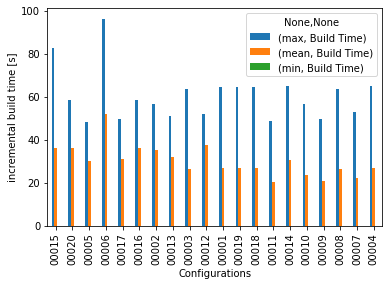

In [9]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

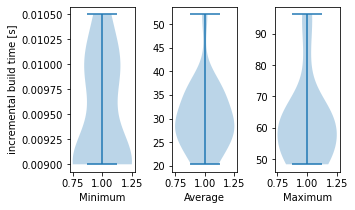

In [10]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [11]:
# Converting the Pivot Table to Data Frame

ptbl = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])

ptbl.columns = ptbl.columns.droplevel(level=0) #remove "Build Time"
ptbl.columns.name = None                       #remove "Br1"
rtbl = ptbl.reset_index() 

tbl = pd.DataFrame(data=rtbl)

tbl = tbl.set_index("Br2")

pd.set_option("display.max_columns", None)

#tbl = df_setindex[['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
#                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
#                '00015', '00016', '00017', '00018', '00019', '00020']]

# Export it to a CSV file, to use it in another notebook
tbl[:].to_csv(path + 'i_data_frame.csv', 
                index=True, 
                header=['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
                '00015', '00016', '00017', '00018', '00019', '00020'])

tbl

,00001,00002,00003,00004,00005,00006,00007,00008,00009,00010,00011,00012,00013,00014,00015,00016,00017,00018,00019,00020
Br2,,,,,,,,,,,,,,,,,,,,
00001,NaN,63.2785,0.0090,0.0100,63.3390,63.4545,0.0095,0.0095,0.0090,0.0095,0.0095,0.0095,64.1750,0.0105,64.1760,64.5650,64.3330,0.0095,0.0105,63.4230
00002,55.4875,NaN,55.4915,55.8920,0.0115,0.0110,55.7530,55.6830,56.4415,56.5050,56.4820,56.4405,0.0125,56.5890,0.0110,0.0100,0.0110,56.4125,56.5905,0.0110
00003,0.0100,62.3780,NaN,0.0095,62.4310,62.5815,0.0100,0.0100,0.0095,0.0095,0.0095,0.0095,63.4775,0.0105,63.4190,63.4700,63.5685,0.0110,0.0110,62.5255
00004,0.0090,63.3690,0.0100,NaN,63.6765,63.7160,0.0090,0.0090,0.0090,0.0100,0.0095,0.0095,64.4160,0.0100,64.4000,64.5060,64.5285,0.0100,0.0090,64.7745
00005,47.0405,0.0105,47.0760,47.3520,NaN,0.0110,47.2895,47.4050,48.3605,48.0505,47.8280,48.0855,0.0110,47.9260,0.0100,0.0100,0.0110,47.8750,47.8690,0.0110
00006,56.5520,0.0105,56.2800,94.2935,38.7750,NaN,94.4995,94.5710,56.8265,96.0475,57.3850,96.2060,0.0110,57.4260,0.0110,0.0105,0.0110,95.8355,95.8155,0.0100
00007,0.0095,51.8745,0.0100,0.0095,52.0505,52.0980,NaN,0.0090,0.0105,0.0100,0.0100,0.0100,52.6950,0.0100,52.8255,52.7510,52.9685,0.0100,0.0095,52.2250
00008,0.0100,62.2755,0.0090,0.0095,62.4310,62.5725,0.0090,NaN,0.0095,0.0095,0.0090,0.0115,63.6525,0.0105,63.5175,63.3245,63.5520,0.0090,0.0090,62.4840
00009,0.0105,48.7050,0.0090,0.0095,48.8440,48.6490,0.0095,0.0090,NaN,0.0090,0.0090,0.0090,49.3935,0.0105,49.5000,49.4055,49.3325,0.0090,0.0100,48.7350
